In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Random Forest （score=0.16512）

# Read Data

In [14]:
sample = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Deal with target value first

In [16]:
# here SalePrice is the target variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

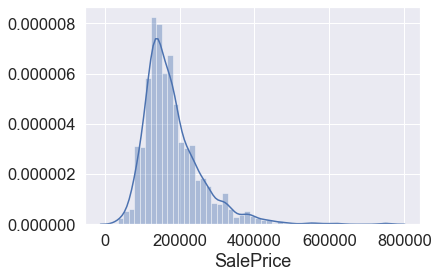

In [17]:
# draw a histogram 
sns.distplot(train['SalePrice'])

In [18]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


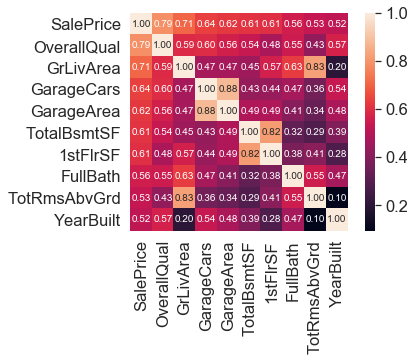

In [19]:
# correlation matrix
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

After reading data description, I choose the following variables:
1. OverallQual
2. GrLivArea
3. GarageCars
4. TotalBsmtSF
5. FullBath
6. TotRmsAbvGrd
7. YearBuilt

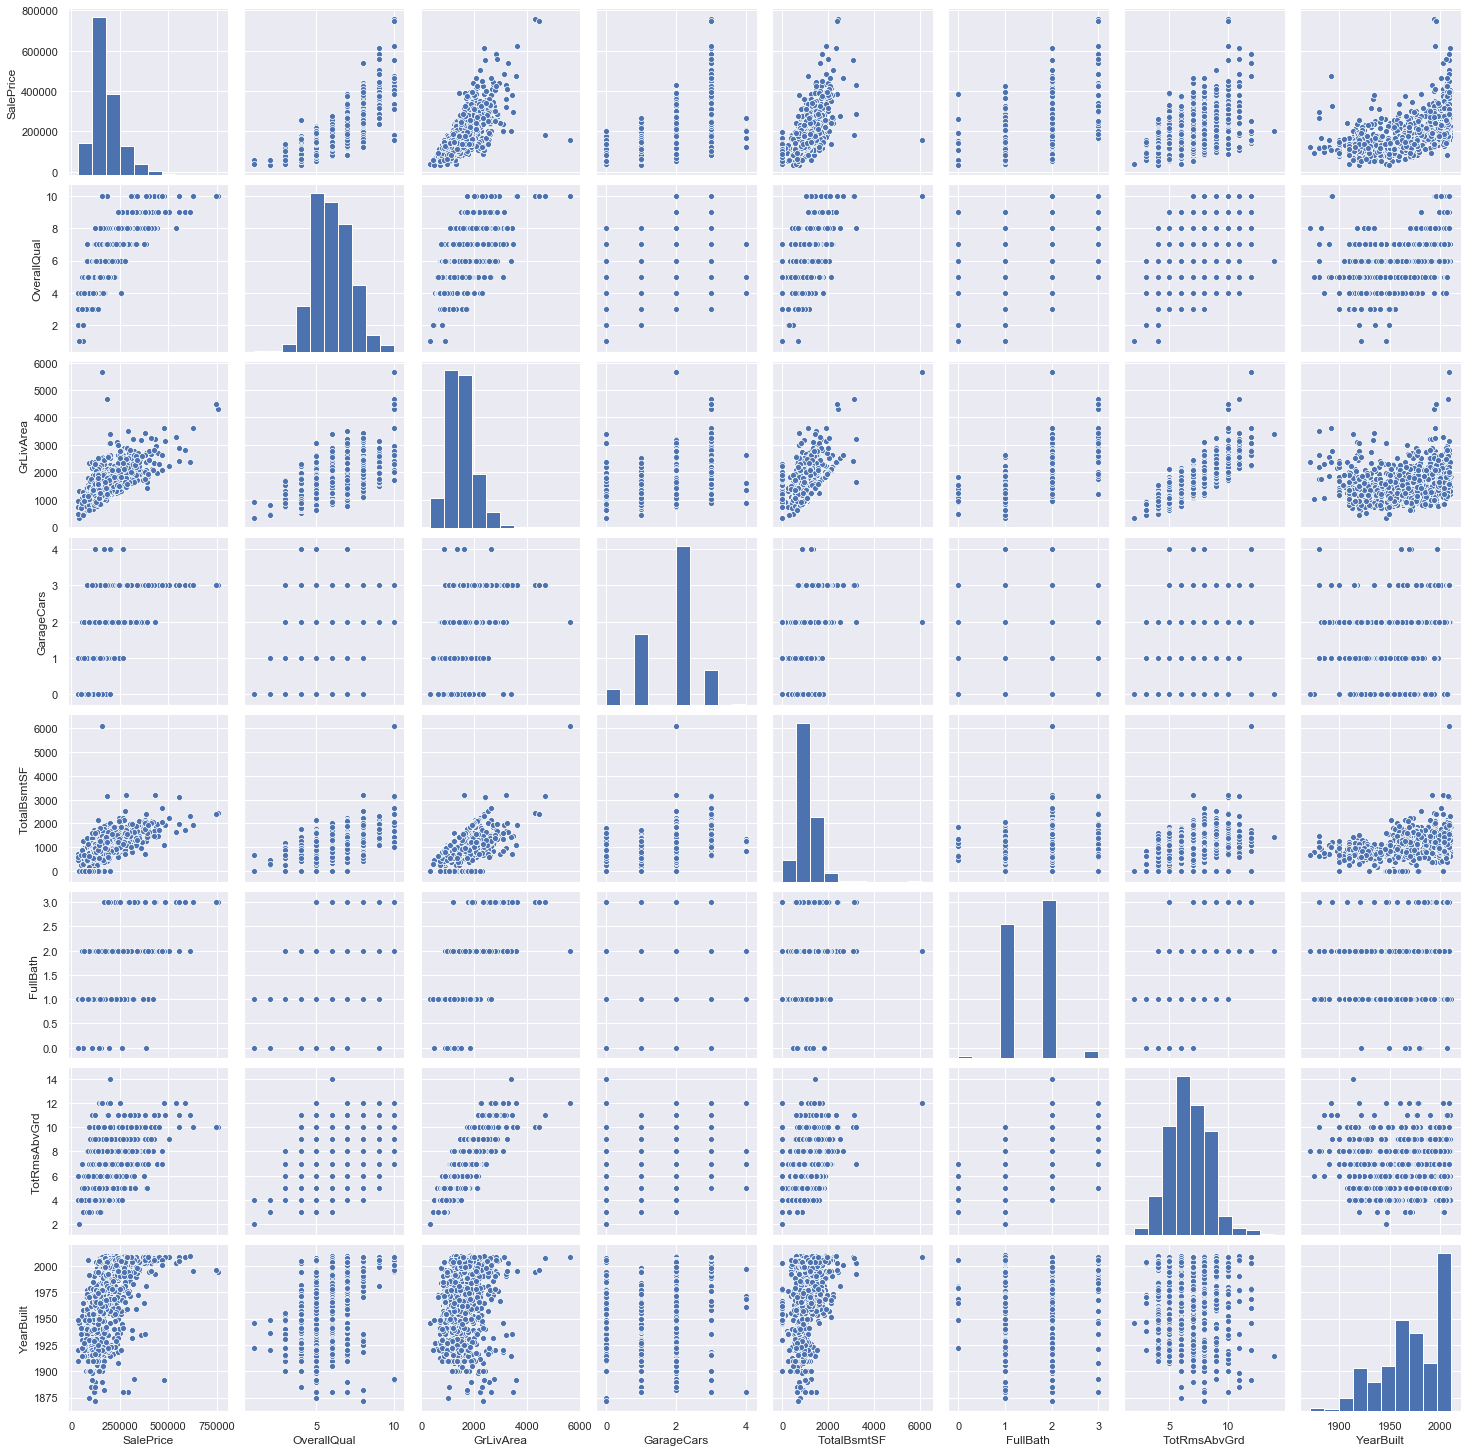

In [20]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [21]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [22]:
# 获取数据
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = train[cols].values
y = train['SalePrice'].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)

In [23]:
clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge()
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

svm cost:-18.002439870767574
RandomForestRegressor cost:-1.6692004510676184
BayesianRidge cost:-17.191504693239168


In [24]:
#test = test.fillna(test.mean)
#test

In [25]:
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = train[cols].values
y = train['SalePrice'].values
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[141341.4375     306883.8825     124665.375      168226.875
 306055.555       78169.57142857 191196.625      153593.85
  78258.07142857 115437.17       164353.875      122384.75
  95958.125      222628.985      188756.3125     123432.75
 193179.75       131673.0625     119201.8125     196999.6
 164489.685      215914.35916667 170340.77       124098.79166667
 187348.25       167449.7        199909.9375      97228.375
 187103.91666667 204007.675      111603.27       233836.46
 177579.8825     110839.9375     256174.4725     142436.375
 160087.2375     205604.2275     312105.6525     106503.25
 136189.125      230107.65       118546.3        373895.715
 139704.125      164542.285      125622.55059524 115867.65
 433664.9025     146365.8725     118752.4375     186945.
 125100.501875   340817.8375     144298.88518849 242078.005
 196112.00333333 154078.5        150824.25       103149.16666667
  80856.32142857 138873.625      310714.355      301625.9625
 266841.715      235719.025      110748.

In [26]:
sum(abs(y_pred - y_test))/len(y_pred) #19574 if not removing missing data

19705.141041222083

In [27]:
test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [28]:
test = test.fillna(test.mean())

In [30]:
X_test = test[cols].values
rfr = clf
Y_pred = rfr.predict(X_test)
print(Y_pred)

[118820.04166667 155532.125      167527.13416667 ... 130875.875
 120637.875      233824.225     ]


In [31]:
prediction = pd.DataFrame(Y_pred, columns=['SalePrice'])
result = pd.concat([test['Id'], prediction], axis=1)
result.to_csv('submission.csv', index=False)

# Lightgbm

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import norm, skew
from sklearn.preprocessing import PowerTransformer
import lightgbm as lgb

In [29]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## check data

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [32]:
# combine train and test data
data = pd.concat([train, test])
data.shape

(2919, 81)

In [33]:
# current categorical data
cat_cols = data.loc[:,data.dtypes == 'object'].columns
data.loc[:,cat_cols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [34]:
# categorical data after conversion to one-hot vector
cat_data = pd.get_dummies(data.loc[:, cat_cols], drop_first=True)
cat_data.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [35]:
# current numeric data
numerics = data.loc[:,data.dtypes != 'object'].drop('Id', axis=1)
numerics.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [36]:
# numeric data after conversion to logarithm
log_numerics = np.log1p(numerics)
log_numerics.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,...,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,1.098612,7.605392,12.247699
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,...,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,1.791759,7.604894,12.109016
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,...,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,2.302585,7.605392,12.317171
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,...,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,1.098612,7.604396,11.849405
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,...,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,2.564949,7.605392,12.429220


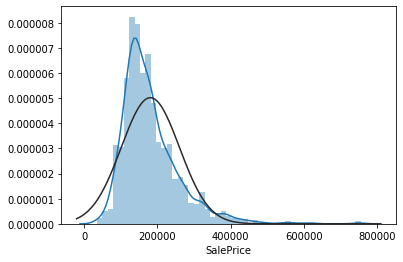

In [37]:
sns.distplot(numerics['SalePrice'],fit=norm)

#(mu, sigma) = norm.fit(train['SalePrice'])
#print("mu = {:.2f} and sigma = {:.2f}".format(mu,sigma))

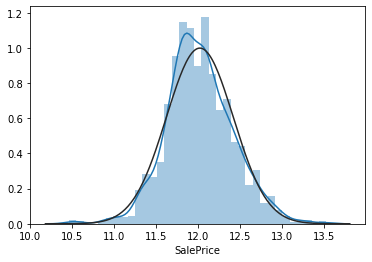

In [38]:
sns.distplot(log_numerics['SalePrice'],fit=norm)

In [39]:
# merge categorical and numeric columns
optimized_data = pd.concat([data['Id'], cat_data, log_numerics], axis=1)
optimized_data.head()

,Id,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,0,0,1,0,1,0,0,0,1,...,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,1.098612,7.605392,12.247699
1,2,0,0,1,0,1,0,0,0,1,...,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,1.791759,7.604894,12.109016
2,3,0,0,1,0,1,0,0,0,0,...,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,2.302585,7.605392,12.317171
3,4,0,0,1,0,1,0,0,0,0,...,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,1.098612,7.604396,11.849405
4,5,0,0,1,0,1,0,0,0,0,...,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,2.564949,7.605392,12.429220


In [40]:
for col in optimized_data.columns:
    optimized_data[col].fillna(optimized_data[col].mean(), inplace=True)
optimized_data.isnull().sum()

Id             0
MSZoning_FV    0
MSZoning_RH    0
MSZoning_RL    0
MSZoning_RM    0
              ..
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
SalePrice      0
Length: 247, dtype: int64

In [41]:
# split data into X_train, y_train and test
train = optimized_data[:train.shape[0]]
test_id = optimized_data[train.shape[0]:]['Id']
y_test = optimized_data[train.shape[0]:]['SalePrice']
test = optimized_data[train.shape[0]:].drop(['Id', 'SalePrice'], axis=1)
X_train = train.drop(['Id', 'SalePrice'], axis=1)
y_train = train['SalePrice']

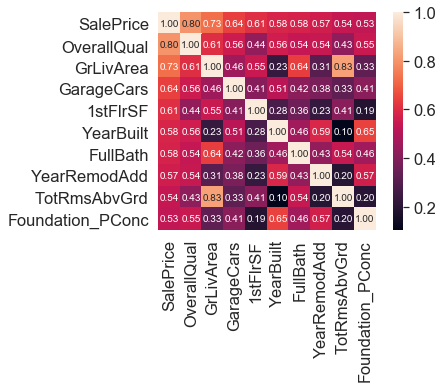

In [47]:
# correlation matrix
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
           

In [42]:
# train
lgb_train = lgb.Dataset(X_train, y_train)
params = {
        'task' : 'train',
        'boosting_type' : 'gbdt',
        'objective' : 'regression',
        'metric' : {'l2'},
        'num_leaves' : 40,
        'learning_rate' : 0.1,
        'feature_fraction' : 0.9,
        'bagging_fraction' : 0.8,
        'bagging_freq': 5,
        'verbose' : 0
}
gbm = lgb.train(params, lgb_train)
# predict
pred = gbm.predict(test)

In [43]:
# convert logarithms into exponent
pred = np.expm1(pred)
y_test = np.expm1(y_test)
# create submission file
results = pd.Series(pred, name='SalePrice')
submission = pd.concat([test_id, results], axis=1)
submission.to_csv('submission_lightgbm.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,128258.038137
1,1462,158879.195831
2,1463,186705.682629
3,1464,184104.460556
4,1465,176855.834185


In [45]:
sum(abs(pred - y_test))/len(pred)

54440.050031928615